Barry -Business understanding
Drove -Data understanding
Directly to the -Data prep
Medical -Modelling
Emergency -Evaluation
Department -mDeployment

##1 BUSINESS UNDERSTANDING 
- forecasting transactions
-Likely regression
-data for y3 years
- Advised data quality is okay

##2 DATA UNDERSTANDING



In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv(r"C:\Users\DIP\Downloads\ScikitLearnRegression-master\ScikitLearnRegression-master\regression.csv")

In [7]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [8]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [9]:
df.info()#check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [10]:
for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [11]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


Visualize data


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

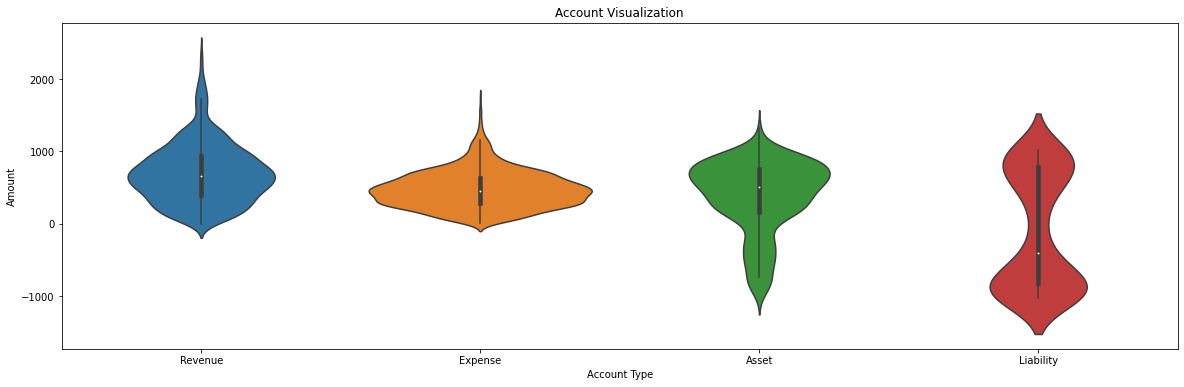

In [13]:
plt.figure(figsize=(20,6))
sns.violinplot(x= 'Account Type', y= 'Amount', data=df).set_title ('Account Visualization')
plt.show()

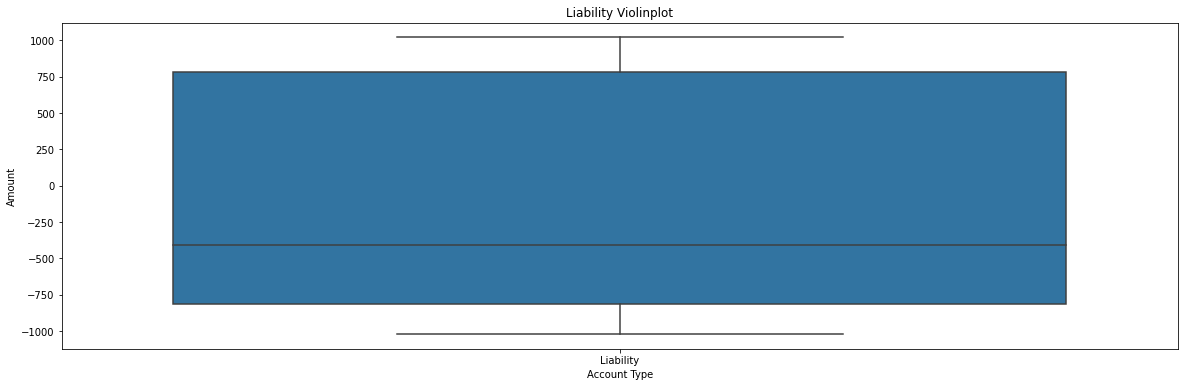

In [14]:
plt.figure(figsize=(20,6))
sns.boxplot(x= 'Account Type', y= 'Amount', data=df[df['Account Type']=='Liability']).set_title('Liability Violinplot')
plt.show()

Review Trends

In [15]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [16]:
monthmap = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12,
}

In [17]:
monthmap['Jan']

1

In [18]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [19]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [20]:
df['Day'] = 1

In [21]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1


In [22]:
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)

In [23]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-Jan-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-Jan-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-Jan-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-Jan-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-Jan-1


In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

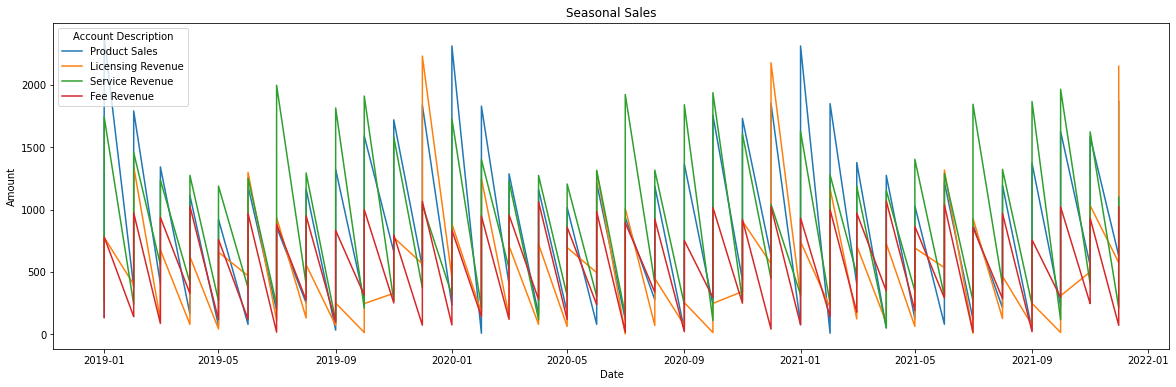

In [26]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue= 'Account Description',estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

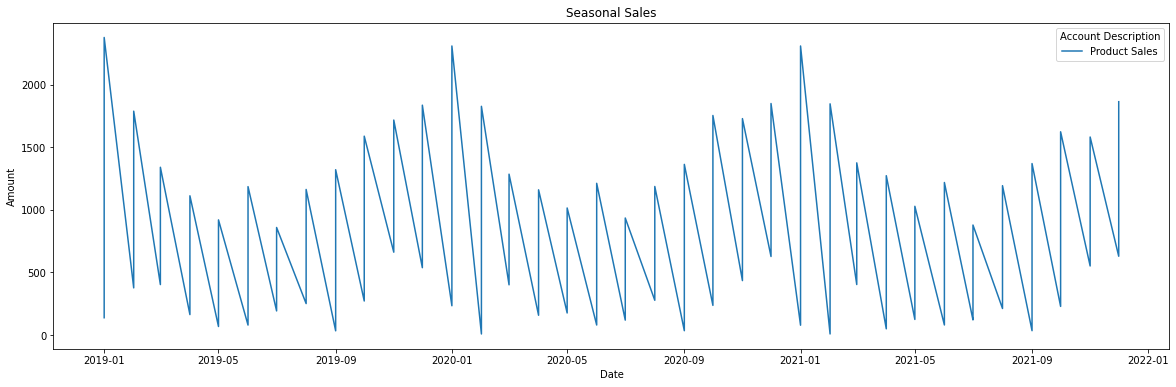

In [27]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
plt.show()

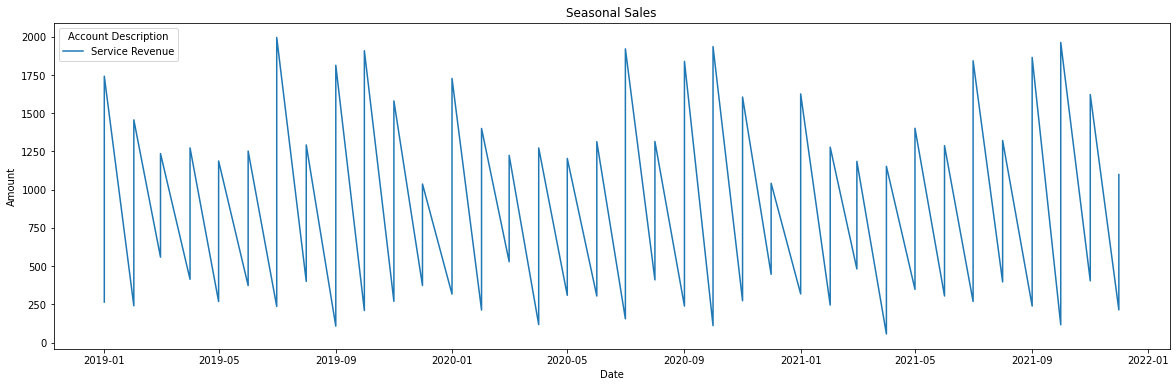

In [28]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

CORRELATION VALUES


In [29]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [30]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [31]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
corrdict ={}
for key, row  in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [33]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [34]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


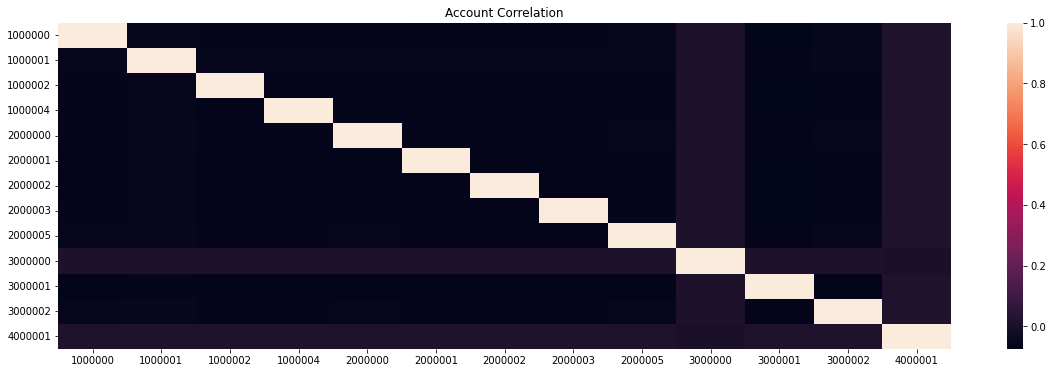

In [35]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

In [36]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [40]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


DATA PREPARATION

In [41]:
import numpy as np

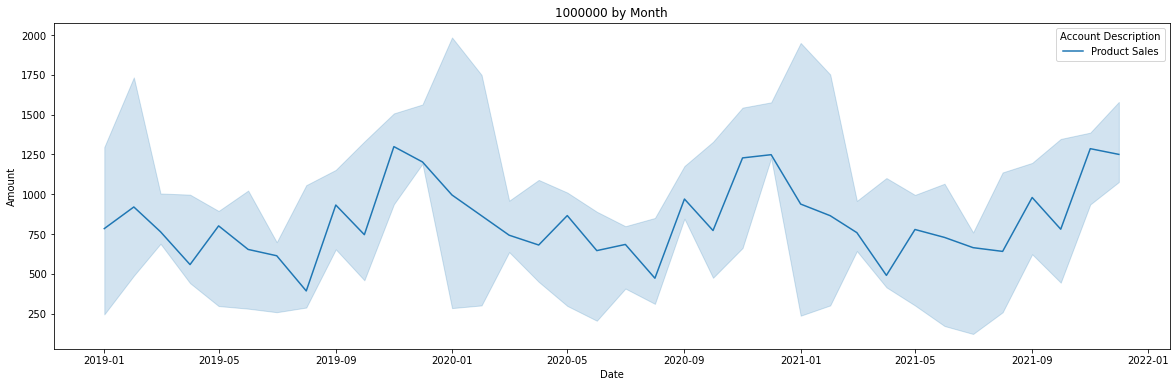

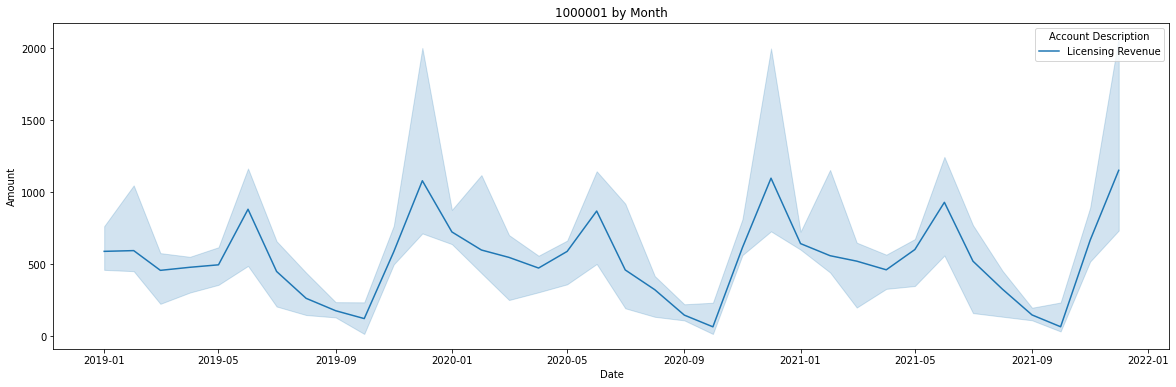

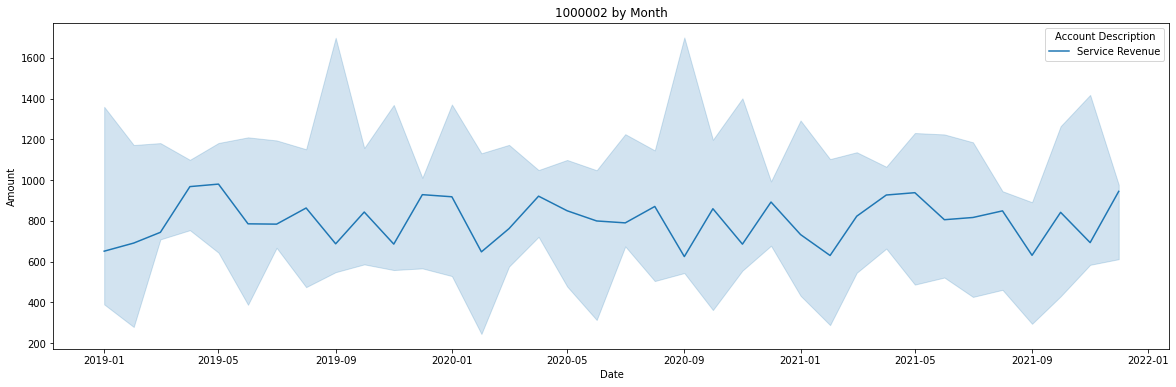

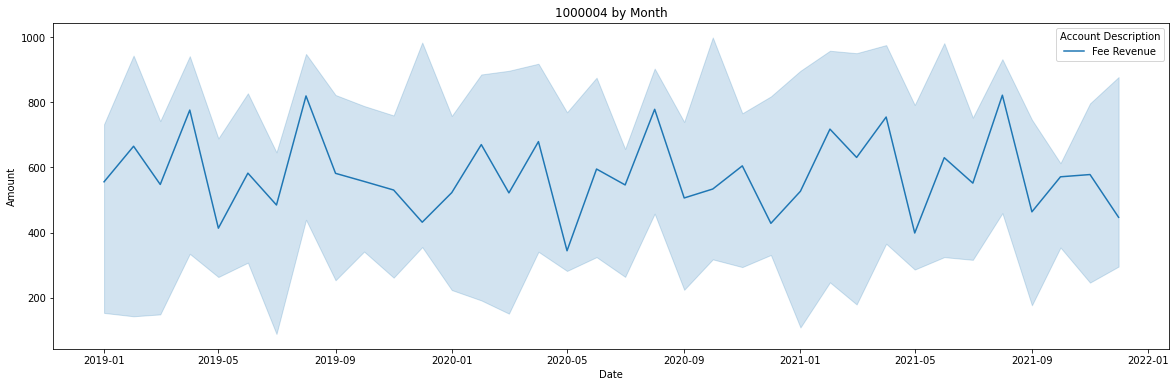

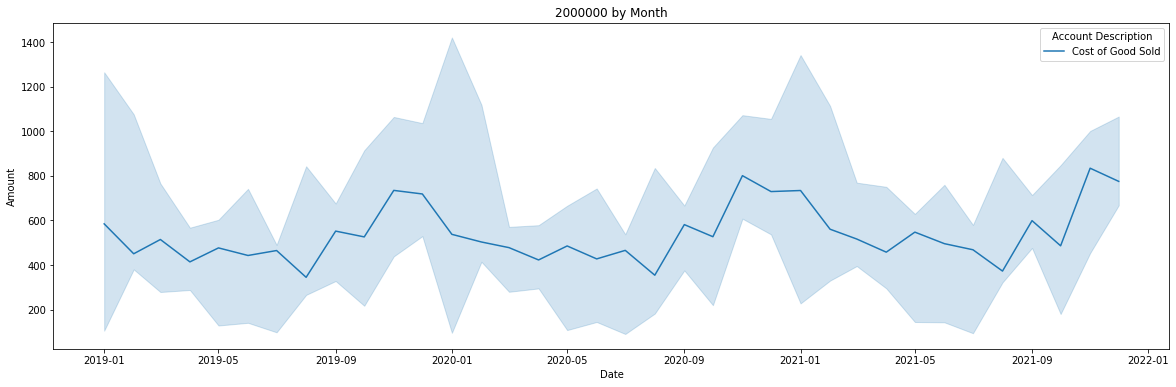

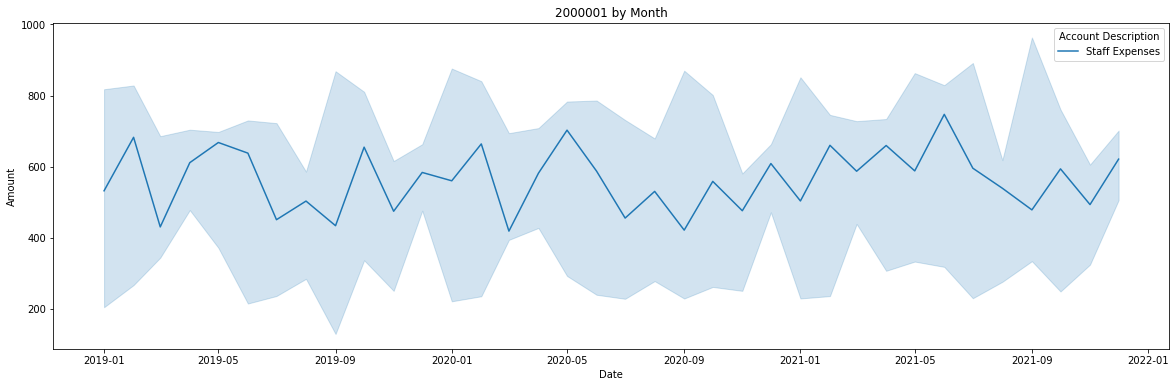

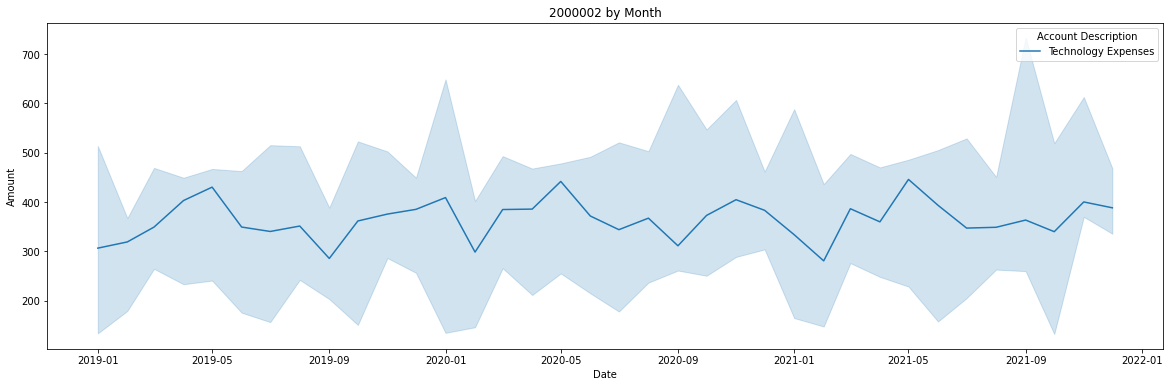

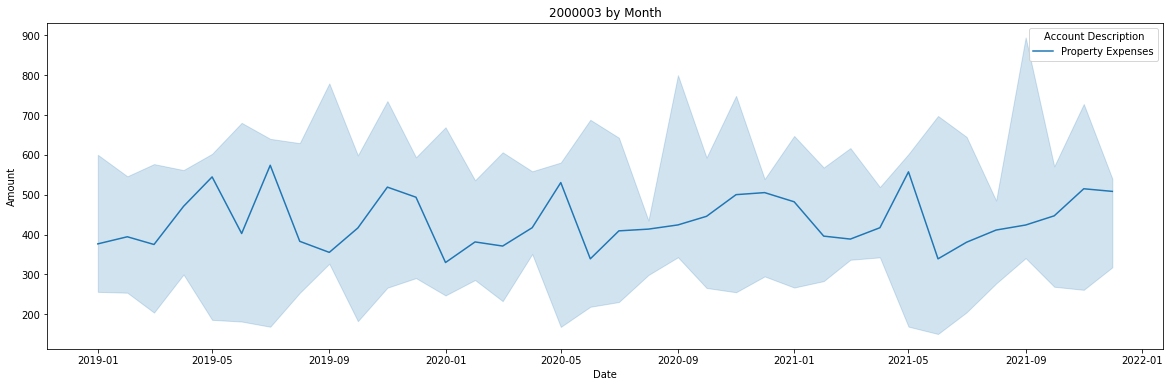

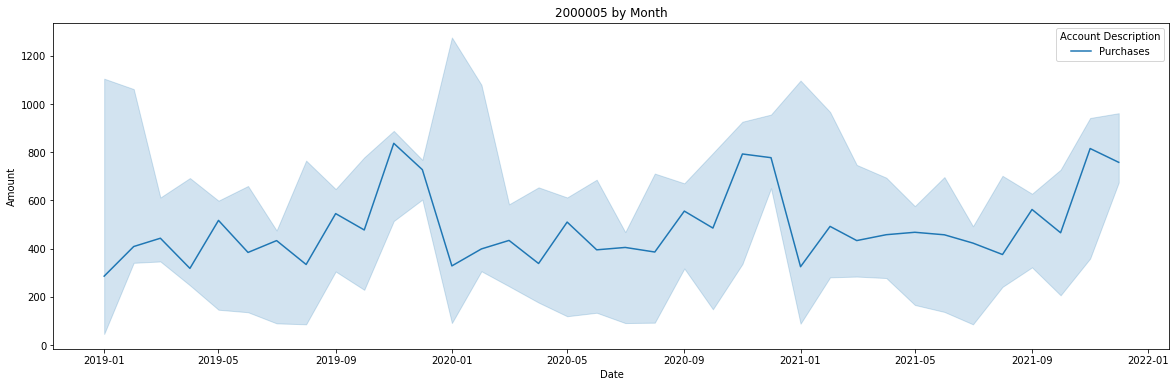

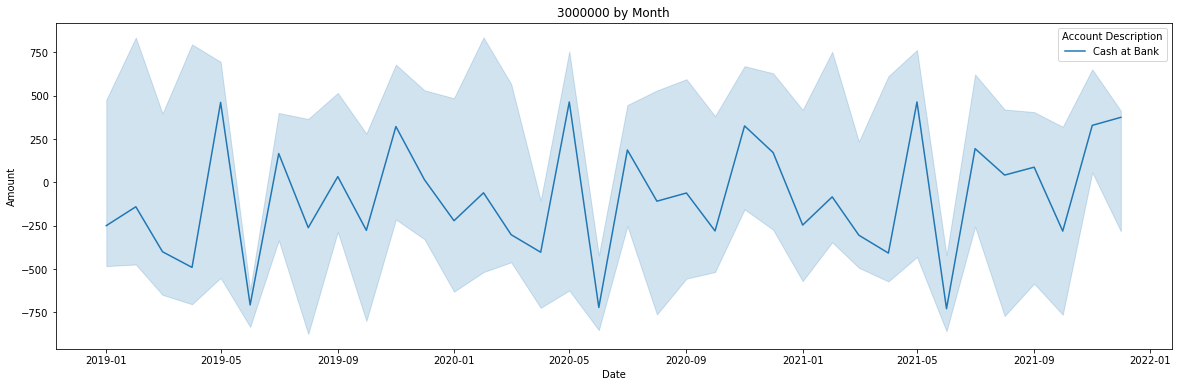

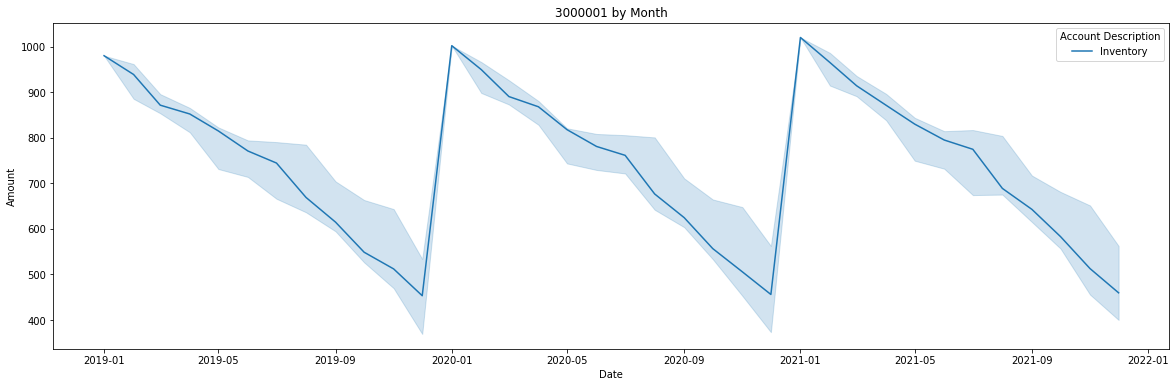

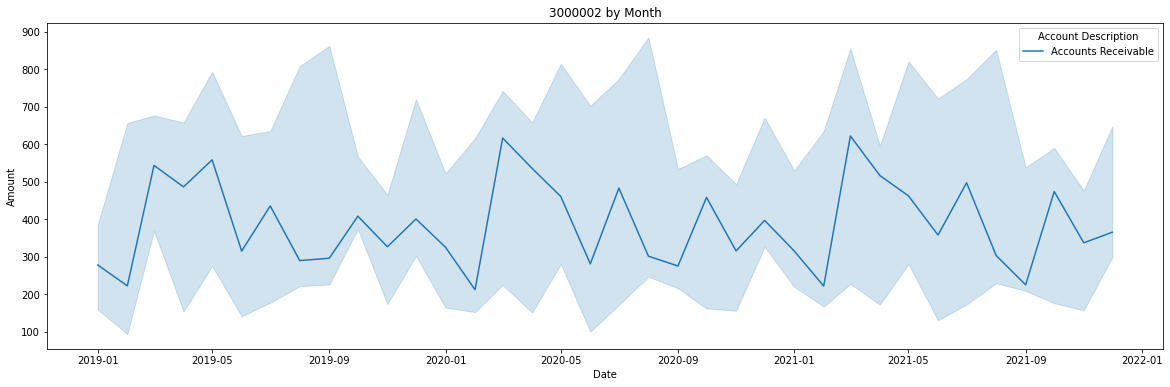

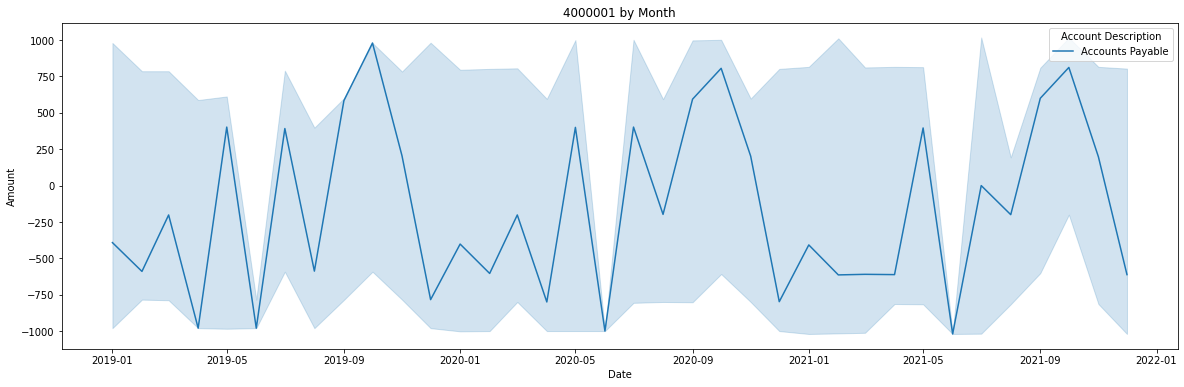

In [44]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median,  hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

In [45]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

CONVERT FIELDS TO CORRECT DATA TYPES

In [46]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [47]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [48]:
df['Year'] = df['Year'].astype(str)

In [49]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

DROP ANALYSIS FIELDS

In [51]:
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)

In [52]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [53]:
len(df['Account'].unique())

13

In [54]:
len(df['Account Description'].unique())

13

In [55]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [56]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [57]:
len(df['AccountVal'].unique())

13

In [58]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [59]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


In [60]:
pd.get_dummies(df)

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4209,537.478,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [61]:
df = pd.get_dummies(df)

In [62]:
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

MODELLING


df.dtypes

##3 DATA PREPARATION

##4 MODELLING

##EVALUATION

##DEPLOYMENT